### Extract reviews of any product from ecommerce website like amazon and perform emotion mining

In [1]:
import requests
import pandas as pd
from bs4 import BeautifulSoup as bs
import re

In [2]:
url='https://www.amazon.in/Samsung-Galaxy-Ultra-Phantom-Storage/product-reviews/B0BT9FDZ8N/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews'
url

'https://www.amazon.in/Samsung-Galaxy-Ultra-Phantom-Storage/product-reviews/B0BT9FDZ8N/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews'

In [3]:
header = {
    'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/117.0.0.0 Safari/537.36',
    'Accept-Language':'en-US,en-IN;q=0.9,en;q=0.8',
    'Referer': 'https://www.amazon.in/Samsung-Galaxy-Ultra-Phantom-Storage/product-reviews/B0BT9FDZ8N/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews'
}

In [4]:
search_response = requests.get(url,headers = header)

In [5]:
search_response.status_code #200 means it is successful

200

In [6]:
search_response.text

'<!doctype html><html lang="en-in" class="a-no-js" data-19ax5a9jf="dingo"><!-- sp:feature:head-start -->\n<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>\n<!-- sp:end-feature:head-start -->\n<!-- sp:feature:csm:head-open-part1 -->\n\n<script type=\'text/javascript\'>var ue_t0=ue_t0||+new Date();</script>\n<!-- sp:end-feature:csm:head-open-part1 -->\n<!-- sp:feature:cs-optimization -->\n<meta http-equiv=\'x-dns-prefetch-control\' content=\'on\'>\n<link rel="dns-prefetch" href="https://images-eu.ssl-images-amazon.com" crossorigin>\n<link rel="preconnect" href="https://images-eu.ssl-images-amazon.com" crossorigin>\n<link rel="dns-prefetch" href="https://m.media-amazon.com" crossorigin>\n<link rel="preconnect" href="https://m.media-amazon.com" crossorigin>\n<link rel="dns-prefetch" href="https://completion.amazon.com" crossorigin>\n<link rel="preconnect" href="https://completion.amazon.com" crossorigin>\n<!-- sp:end-feature:cs-optimization -->\n<!-- s

In [7]:
search_response.cookies

<RequestsCookieJar[Cookie(version=0, name='i18n-prefs', value='INR', port=None, port_specified=False, domain='.amazon.in', domain_specified=True, domain_initial_dot=True, path='/', path_specified=True, secure=False, expires=1726846069, discard=False, comment=None, comment_url=None, rest={}, rfc2109=False), Cookie(version=0, name='session-id', value='260-4893604-4404929', port=None, port_specified=False, domain='.amazon.in', domain_specified=True, domain_initial_dot=True, path='/', path_specified=True, secure=True, expires=1726846069, discard=False, comment=None, comment_url=None, rest={}, rfc2109=False), Cookie(version=0, name='session-id-time', value='2082787201l', port=None, port_specified=False, domain='.amazon.in', domain_specified=True, domain_initial_dot=True, path='/', path_specified=True, secure=True, expires=1726846069, discard=False, comment=None, comment_url=None, rest={}, rfc2109=False)]>

In [8]:
#getting review body out of the html page
soup = bs(search_response.content,'html.parser')
review = soup.find_all('span',{'data-hook':'review-body'})
review[:2]

[<span class="a-size-base review-text review-text-content" data-hook="review-body">
 <span>After using Samsung Galaxy S23 Ultra for quite a bit as a daily driver and coming back to Samsung after a long time after using other smaller form factor phones like ONEPLUS 9, here's what I think about this phone.<br/><br/>PROS:<br/><br/>- This phone has the best camera ever installed into a smartphone, hands-down! No other phone made in human history can ever come close to 1% of what Samsung Galaxy S23 Ultra's cameras can do.<br/><br/>- Performance is crazy! Not only it has Snapdragon 8Gen-2, but that too custom-made for Samsung Galaxy phones. You can play any games, run any apps and do whatever you'd want from a phone that is used at work, gaming, taking photos/videos and for personal use at the same time.<br/><br/>- Rectangular form factor of this phone makes it so much comfortable and easy to hold. And it looks very premium too, which obviously is expected from a phone that costs this much.<

In [9]:
# Converting to text:
review_content = []
for i in range(0,len(review)):
    review_content.append(review[i].get_text())
review_content[:]=[reviews.strip("\n") for reviews in review_content]
review_content[:2]

['After using Samsung Galaxy S23 Ultra for quite a bit as a daily driver and coming back to Samsung after a long time after using other smaller form factor phones like ONEPLUS 9, here\'s what I think about this phone.PROS:- This phone has the best camera ever installed into a smartphone, hands-down! No other phone made in human history can ever come close to 1% of what Samsung Galaxy S23 Ultra\'s cameras can do.- Performance is crazy! Not only it has Snapdragon 8Gen-2, but that too custom-made for Samsung Galaxy phones. You can play any games, run any apps and do whatever you\'d want from a phone that is used at work, gaming, taking photos/videos and for personal use at the same time.- Rectangular form factor of this phone makes it so much comfortable and easy to hold. And it looks very premium too, which obviously is expected from a phone that costs this much.- OneUI has so many great features that they cannot be listed in one place. It brings a whole new meaning to "smart" in smartph

### Now we have 10 reviews based on which we'll go ahead and do emotion mining:

In [42]:
# Importing libraries: 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import itertools
import nltk
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import spacy

In [11]:
Reviews = pd.DataFrame(data = review_content,columns=['Review'])
Reviews.head()

,Review
0,After using Samsung Galaxy S23 Ultra for quite...
1,I am enjoying every moment with my phoneThe ca...
2,I was using in an iphone 13 and i was planing ...
3,Everything is great except finger print unlock...
4,Phone pic zoom is very nice


In [25]:
#Number of Words in single review:
Reviews['Word_count'] = Reviews['Review'].apply(lambda x: len(str(x).split(" ")))
Reviews.head()

,Review,Word_count
0,samsung galaxy ultra bit daily driver coming ...,342
1,enjoying moment phonethe camera top notch sing...,13
2,iphone planing switch android checked ultra...,21
3,great finger print unlock face unlock previous...,10
4,phone pic zoom nice,4


In [13]:
#Coverting to lower case:
Reviews.Review = Reviews.Review.apply(lambda x : ' '.join(x.lower() for x in x.split(' ')))
Reviews.head()

,Review,Word_count
0,after using samsung galaxy s23 ultra for quite...,667
1,i am enjoying every moment with my phonethe ca...,33
2,i was using in an iphone 13 and i was planing ...,54
3,everything is great except finger print unlock...,19
4,phone pic zoom is very nice,6


In [14]:
#Removing numerical values: 
Reviews.Review = Reviews.Review.apply(lambda x : ' '.join(re.sub("[0-9" "]+"," ",x) for x in x.split(' ')))
Reviews.head()

,Review,Word_count
0,after using samsung galaxy s ultra for quite ...,667
1,i am enjoying every moment with my phonethe ca...,33
2,i was using in an iphone and i was planing t...,54
3,everything is great except finger print unlock...,19
4,phone pic zoom is very nice,6


In [15]:
# Removing punctuation:
Reviews.Review = Reviews.Review.str.replace('[^\w\s]','')
Reviews.Review = Reviews.Review.str.replace('\n',' ')
Reviews.Review = Reviews.Review.str.replace('_','')
Reviews.Review = Reviews.Review.str.replace('\\','')

Reviews.head()

,Review,Word_count
0,after using samsung galaxy s ultra for quite ...,667
1,i am enjoying every moment with my phonethe ca...,33
2,i was using in an iphone and i was planing t...,54
3,everything is great except finger print unlock...,19
4,phone pic zoom is very nice,6


In [16]:
#importing stopwords from txt file provided:
with open('stop.txt',"r") as file:
    stopwords = file.read()
stopwords = stopwords.split()


In [17]:
# removing Stopwords:
Reviews.Review = Reviews.Review.apply(lambda x: " ".join(x for x in x.split(' ') if x not in stopwords))
Reviews.head()

,Review,Word_count
0,samsung galaxy ultra bit daily driver coming ...,667
1,enjoying moment phonethe camera top notch sing...,33
2,iphone planing switch android checked ultra...,54
3,great finger print unlock face unlock previous...,19
4,phone pic zoom nice,6


In [26]:
# Stemming:
st = PorterStemmer()
Reviews['Review'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
Reviews.head()

,Review,Word_count
0,samsung galaxy ultra bit daily driver coming ...,342
1,enjoying moment phonethe camera top notch sing...,13
2,iphone planing switch android checked ultra...,21
3,great finger print unlock face unlock previous...,10
4,phone pic zoom nice,4


In [27]:
#let's check frequency of each word:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(Reviews['Review'])
word_freq_df = pd.DataFrame({'term': vectorizer.get_feature_names_out(), 'occurrences':np.asarray(X.sum(axis=0)).ravel().tolist()})
word_freq_df['frequency'] = word_freq_df['occurrences']/np.sum(word_freq_df['occurrences'])
word_freq_df.head()

,term,occurrences,frequency
0,ability,1,0.001838
1,access,1,0.001838
2,addon,1,0.001838
3,adds,1,0.001838
4,allrounder,1,0.001838


In [29]:
#Term Frequency – Inverse Document Frequency (TF-IDF):
vectorizer = TfidfVectorizer(stop_words='english', max_df = 0.5, smooth_idf=True) #keep top 100 words
doc_vec = vectorizer.fit_transform(Reviews['Review'])
names_features = vectorizer.get_feature_names_out()
dense = doc_vec.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns = names_features)
df

,ability,access,addon,adds,allrounder,amazed,android,anytime,app,apple,...,wireless,wonders,work,worth,worththank,youd,youll,youtube,youve,zoom
0,0.042783,0.042783,0.042783,0.042783,0.00000,0.00000,0.000000,0.00000,0.109109,0.063638,...,0.042783,0.042783,0.12835,0.000000,0.000000,0.042783,0.042783,0.00000,0.085567,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.225515,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.161499,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.606043
5,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.13639,0.13639,0.090185,0.13639,0.000000,0.202874,...,0.000000,0.000000,0.00000,0.115944,0.000000,0.000000,0.000000,0.13639,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.134780,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.460628,0.000000,0.000000,0.00000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.00000,0.058081,0.355697,...,0.000000,0.000000,0.00000,0.058081,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000


In [30]:
# Bi Gram:
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2), max_features=2000).fit(corpus) 
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec1.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [31]:
top2_words = get_top_n2_words(Reviews['Review'], n=200)# top 200
top2_df = pd.DataFrame(top2_words)
top2_df.columns = ["Bi-gram", "Freq"]
top2_df.head()

,Bi-gram,Freq
0,samsung galaxy,6
1,form factor,3
2,good lock,3
3,call recorder,3
4,galaxy ultra,2
5,smaller form,2
6,phone camera,2
7,build quality,2
8,curved display,2
9,app lock,2


In [32]:
# Tri gram:
def get_top_n3_words(corpus, n=None):
    vec2 = CountVectorizer(ngram_range=(3,3), max_features=2000).fit(corpus) 
    bag_of_words = vec2.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec2.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [34]:
top3_words = get_top_n3_words(Reviews['Review'], n=200)# top 200
top3_df = pd.DataFrame(top3_words)
top3_df.columns = ["Tri-gram", "Freq"]
top3_df.head()

,Tri-gram,Freq
0,samsung galaxy ultra,2
1,smaller form factor,2
2,good lock module,2
3,samsung apple camera,2
4,galaxy ultra bit,1


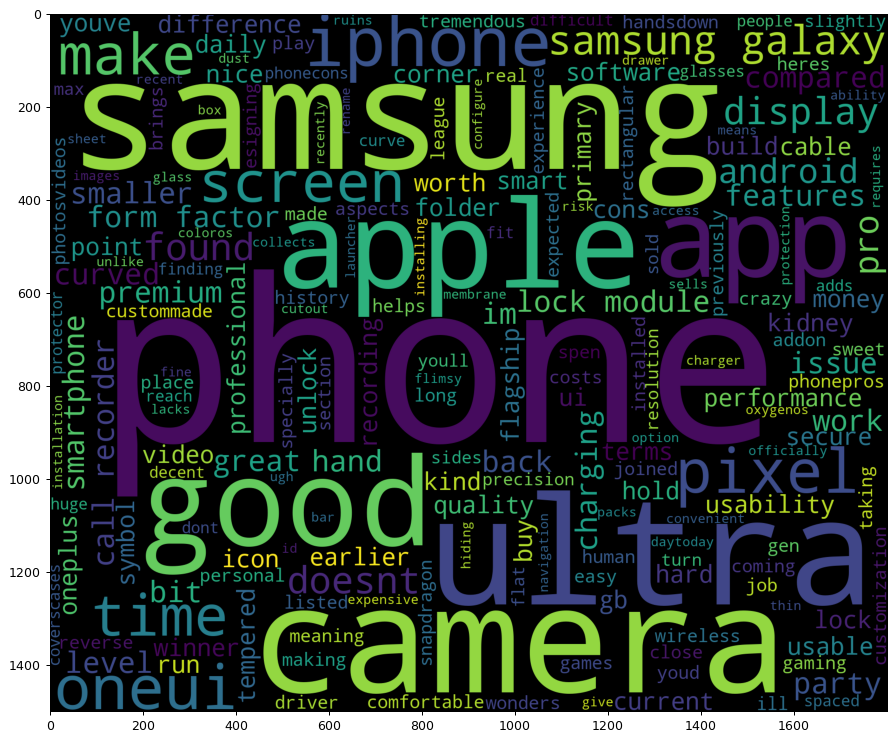

In [35]:
#wordcloud for entire corpus

string_Total = " ".join(Reviews['Review'])

plt.figure(figsize=(12,12),dpi=90)
wordcloud_stw = WordCloud(background_color= 'black', width = 1800, height = 1500).generate(string_Total)
plt.imshow(wordcloud_stw)

### Sentiment Analysis

In [36]:
# fetch_sentiment_using_textblob: 
def fetch_sentiment_using_textblob(text):
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity
    return 'pos' if analysis.sentiment.polarity >= 0 else 'neg'
fetch_sentiment_using_textblob(string_Total)

'pos'

In [60]:
# Get The Subjectivity
def sentiment_analysis(ds):
    sentiment = TextBlob(ds["Review"]).sentiment
    return pd.Series([sentiment.subjectivity, sentiment.polarity])

# Adding Subjectivity & Polarity to df:
Reviews[["subjectivity", "polarity"]] = Reviews.apply(sentiment_analysis, axis=1)
Reviews.head()

,Review,Word_count,subjectivity,polarity
0,samsung galaxy ultra bit daily driver coming ...,342,0.528717,0.162464
1,enjoying moment phonethe camera top notch sing...,13,0.438095,0.309524
2,iphone planing switch android checked ultra...,21,0.540000,0.160000
3,great finger print unlock face unlock previous...,10,0.458333,0.316667
4,phone pic zoom nice,4,1.000000,0.600000


In [61]:
# Compute The Negative, Neutral, Positive Analysis
def analysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
# Create a New Analysis Column
Reviews["analysis"] = Reviews["polarity"].apply(analysis)

In [65]:
Reviews

,Review,Word_count,subjectivity,polarity,analysis
0,samsung galaxy ultra bit daily driver coming ...,342,0.528717,0.162464,Positive
1,enjoying moment phonethe camera top notch sing...,13,0.438095,0.309524,Positive
2,iphone planing switch android checked ultra...,21,0.540000,0.160000,Positive
3,great finger print unlock face unlock previous...,10,0.458333,0.316667,Positive
4,phone pic zoom nice,4,1.000000,0.600000,Positive
5,im satisfied product mine gb im great full d...,18,0.616667,0.425000,Positive
6,phone good allrounder beautiful display watch ...,61,0.497917,0.325000,Positive
7,iphone terms heard talking iphones video recor...,23,0.605556,0.433333,Positive
8,time flagship worththank god choose iphone,6,0.000000,0.000000,Neutral
9,samsung follower sing samsung galaxy series b...,118,0.283333,0.166667,Positive


In [62]:
sum(Reviews.polarity)

2.898654033041788

#### Since the sum of polarity is positive, we can conclude that sentiment of this product is positive.